In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

#클러스터링 위한 패키지
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #미리 스케일링 선언함
 
#엘보우 메소드 정의
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(1, 10):
        km = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)

    plt.plot(range(1, 10), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()

#실루엣 스코어 정의
def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

In [7]:
seoul_data = pd.read_csv('./data/seoul_newdata100.csv',encoding='cp949')

In [8]:
dong = seoul_data.iloc[:,[0]] #cluster labeling 후 행정동 붙여서 비교하기 위해 dong으로 빼둠
#clustering 시 필요없는 변수 삭제
seoul_data = seoul_data.drop('인구 (명)', axis = 1)
seoul_data = seoul_data.drop('면적 (㎢)', axis = 1)
seoul_data = seoul_data.drop('구', axis = 1)
#seoul_data = seoul_data.drop('행정동명', axis = 1)
seoul_data = seoul_data.drop('행정동_코드', axis = 1)
seoul_data = seoul_data.drop('총반납대여', axis = 1)

In [9]:
#문자 타입 숫자로 변환
seoul_data = pd.get_dummies(seoul_data, columns = ['강']) 

#문자 타입 숫자로 변환(하천 존재할 시 1, 존재하지 않을 시 0)
seoul_data['하천'] = seoul_data['하천'].fillna(0).map(lambda x: 1 if x != 0 else x)
seoul_data = seoul_data.fillna(0)

In [10]:
seoul_data #데이터 형태 확인

,행정동명,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강
0,길동,16,20910,0,15037.121330,7.773498,445294.0,536472,12.0,0.0,0.0,0
1,천호2동,23,21545,0,11209.737490,5.794917,0.0,547707,3.0,0.0,1.0,1
2,강일동,10,14627,0,10955.219290,5.663343,0.0,545602,5.0,0.0,0.0,0
3,성내1동,10,34310,0,6594.937949,3.409279,556052.0,292199,4.0,1.0,0.0,0
4,둔촌2동,7,24772,0,8045.492894,4.159149,547905.0,386934,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,명동,18,3675,0,1366.467791,0.575983,3618220.0,1471245,3.0,1.0,0.0,0
96,광희동,20,9030,0,2509.823469,1.057921,1755720.0,705689,1.0,2.0,1.0,0
97,신내1동,9,14924,0,10553.978530,0.975819,0.0,771760,3.0,0.0,1.0,0
98,상봉2동,9,31711,0,5693.982606,0.526465,0.0,647843,0.0,1.0,0.0,0


In [8]:
array_seoul_data = seoul_data.to_numpy() #array꼴로 바꿈
data_scaled = scaler.fit_transform(array_seoul_data) #스케일링

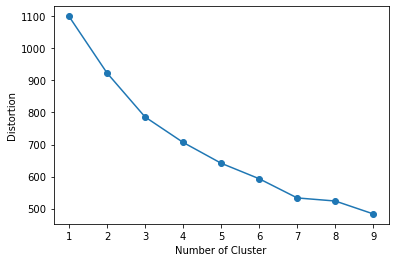

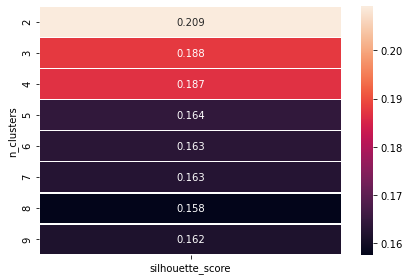

In [9]:
visualize_elbowmethod(data_scaled)
visualize_silhouette_layer(data_scaled)

In [10]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [11]:
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[ 9.41509434e+00  2.37515660e+04  2.45283019e-01  7.54384462e+03
   2.61074495e+00  1.26755853e+06  6.10625491e+05  3.58490566e+00
   3.58490566e-01  1.50943396e-01 -2.22044605e-16]
 [ 2.30000000e+01  8.58250000e+03  2.50000000e-01  8.19099848e+03
   3.37434433e+00  1.00834180e+07  2.81535900e+06  2.00000000e+00
   2.25000000e+00  1.25000000e+00  2.50000000e-01]
 [ 1.98076923e+01  2.10137308e+04  2.69230769e-01  1.29636882e+04
   4.91685754e+00  1.08564858e+06  8.96816615e+05  6.76923077e+00
   6.15384615e-01  2.30769231e-01 -8.32667268e-17]
 [ 1.01764706e+01  1.58031176e+04  2.35294118e-01  8.79084684e+03
   3.73999954e+00  1.47321747e+06  7.06691824e+05  3.29411765e+00
   4.11764706e-01  1.17647059e-01  1.00000000e+00]]


In [12]:
assignments_seoul_scaled = kmeans.labels_
print(assignments_seoul_scaled)

[2 3 2 0 0 2 2 0 2 2 0 3 2 0 2 3 0 0 0 0 0 3 3 0 0 0 0 2 1 2 0 0 2 2 0 0 2
 0 0 0 0 2 0 0 0 0 3 0 3 1 2 3 3 0 3 0 2 3 3 0 0 0 0 3 0 2 0 3 2 2 0 2 0 0
 2 2 0 2 0 0 1 3 2 2 3 0 0 0 3 2 0 0 1 0 0 0 0 0 0 0]


In [13]:
seoul_data["cluster"]=assignments_seoul_scaled
seoul_data["행정동명"]= dong

In [14]:
seoul_data

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강,cluster,행정동명
0,16,20910,0,15037.121330,7.773498,445294.0,536472,12.0,0.0,0.0,0,2,길동
1,23,21545,0,11209.737490,5.794917,0.0,547707,3.0,0.0,1.0,1,3,천호2동
2,10,14627,0,10955.219290,5.663343,0.0,545602,5.0,0.0,0.0,0,2,강일동
3,10,34310,0,6594.937949,3.409279,556052.0,292199,4.0,1.0,0.0,0,0,성내1동
4,7,24772,0,8045.492894,4.159149,547905.0,386934,4.0,0.0,0.0,0,0,둔촌2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18,3675,0,1366.467791,0.575983,3618220.0,1471245,3.0,1.0,0.0,0,0,명동
96,20,9030,0,2509.823469,1.057921,1755720.0,705689,1.0,2.0,1.0,0,0,광희동
97,9,14924,0,10553.978530,0.975819,0.0,771760,3.0,0.0,1.0,0,0,신내1동
98,9,31711,0,5693.982606,0.526465,0.0,647843,0.0,1.0,0.0,0,0,상봉2동


In [15]:
seoul_data.to_csv('./cluster_result/seoul_newcluster100.csv',index=False,encoding='cp949')

## 종로1.2.3.4가동 이상치 제거

In [25]:
org_seoul_data = pd.read_csv('./data/seoul_data100.csv',encoding='UTF8')
seoul_data['행정동명'] = org_seoul_data['행정동명']
seoul_data

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강,cluster,행정동명
0,20,7310,0,9477.400000,3.855000,522372.0,711582,2.0,1.0,0.0,0,6,가양1동
1,20,3919,0,7557.388889,3.511111,7984912.0,2788411,5.0,1.0,0.0,1,4,여의동
2,32,12325,0,9477.400000,3.855000,1919704.0,744341,17.0,0.0,0.0,0,2,발산1동
3,8,23937,0,7557.388889,3.511111,4249030.0,1017536,7.0,0.0,0.0,1,0,당산2동
4,29,3702,0,2607.352941,1.888235,11550312.0,3700523,2.0,4.0,5.0,0,3,종로1.2.3.4가동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,17639,0,7102.937500,4.212500,607635.0,368024,0.0,0.0,1.0,1,0,서강동
96,8,23849,1,7102.937500,4.212500,0.0,439357,2.0,0.0,0.0,0,1,성산1동
97,20,9030,0,3542.800000,1.493333,1755720.0,705689,1.0,2.0,1.0,0,5,광희동
98,12,20606,0,7938.562500,2.793750,1036300.0,872203,2.0,0.0,0.0,0,6,녹번동


In [26]:
seoul_data = seoul_data[seoul_data.cluster != 3] #이상치 제거
dong = seoul_data.iloc[:,[12]] #동열만 추출
dong

,행정동명
0,가양1동
1,여의동
2,발산1동
3,당산2동
5,상암동
...,...
95,서강동
96,성산1동
97,광희동
98,녹번동


In [27]:
seoul_data = seoul_data.drop('cluster', axis = 1)
seoul_data = seoul_data.drop('행정동명', axis = 1)

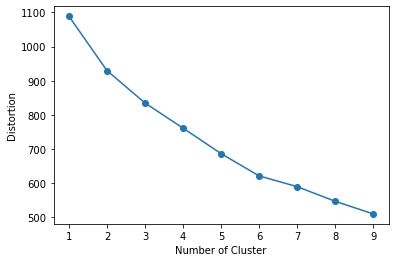

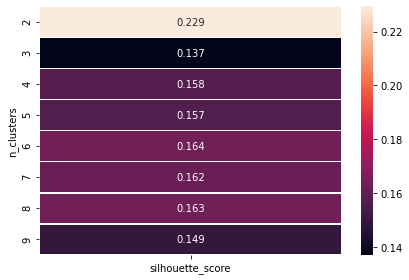

In [28]:
array_seoul_data = seoul_data.to_numpy() #array꼴로 바꿈
data_scaled = scaler.fit_transform(array_seoul_data)
visualize_elbowmethod(data_scaled)
visualize_silhouette_layer(data_scaled)

In [29]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(data_scaled)
assignments_seoul_scaled = kmeans.labels_
print(assignments_seoul_scaled)

[1 0 1 2 0 1 3 2 5 1 1 0 1 5 4 1 1 5 0 5 4 1 4 5 1 5 1 2 4 2 0 1 1 5 2 2 4
 5 2 5 5 4 1 1 1 2 1 1 5 3 1 5 1 4 3 2 4 4 1 2 2 1 5 5 1 3 1 1 1 1 1 3 4 1
 3 1 4 5 1 4 4 4 1 1 1 5 2 2 1 4 3 5 5 5 2 5 3 1 4]


In [30]:
seoul_data["cluster"]=assignments_seoul_scaled
seoul_data["행정동명"]= dong

In [31]:
seoul_data

,시설물개수,인구밀도 (명/㎢),하천,자동차등록대수,자전거도로(km),지하철_총승객수,버스_총승객수,학교개수,영화관개수,대학교개수,강_한강,cluster,행정동명
0,20,7310,0,9477.400000,3.855000,522372.0,711582,2.0,1.0,0.0,0,1,가양1동
1,20,3919,0,7557.388889,3.511111,7984912.0,2788411,5.0,1.0,0.0,1,0,여의동
2,32,12325,0,9477.400000,3.855000,1919704.0,744341,17.0,0.0,0.0,0,1,발산1동
3,8,23937,0,7557.388889,3.511111,4249030.0,1017536,7.0,0.0,0.0,1,2,당산2동
5,19,3671,0,7102.937500,4.212500,4981827.0,1616294,2.0,1.0,0.0,1,0,상암동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11,17639,0,7102.937500,4.212500,607635.0,368024,0.0,0.0,1.0,1,2,서강동
96,8,23849,1,7102.937500,4.212500,0.0,439357,2.0,0.0,0.0,0,5,성산1동
97,20,9030,0,3542.800000,1.493333,1755720.0,705689,1.0,2.0,1.0,0,3,광희동
98,12,20606,0,7938.562500,2.793750,1036300.0,872203,2.0,0.0,0.0,0,1,녹번동


In [32]:
seoul_data.to_csv('./cluster_result/seoul_cluster100_5.csv',index=False,encoding='cp949')